# Stock Prediction Model
This notebook uses a different approach to stock prediction compared to the uploaded model.

In [1]:

import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)


## Download Stock Data

In [2]:

# Fetch data for a stock (e.g., Apple Inc. - AAPL)
ticker = "GOOG"
start_date = "2010-01-01"
end_date = "2023-12-31"

# Download historical stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Display first few rows
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2010-01-04,15.554351,15.622847,15.492058,15.559314,78541293
2010-01-05,15.485855,15.581402,15.425052,15.565022,120638494
2010-01-06,15.095475,15.532262,15.048322,15.532262,159744526
2010-01-07,14.744061,15.138659,14.708075,15.123768,257533695
2010-01-08,14.940615,14.971140,14.620221,14.691943,189680313


## Feature Engineering

In [3]:

# Create features from the data
if 'Adj Close' in data.columns:
    price_column = 'Adj Close'
else:
    price_column = 'Close'

# Feature engineering
data['Return'] = data[price_column].pct_change()
data['MA50'] = data[price_column].rolling(window=50).mean()
data['MA200'] = data[price_column].rolling(window=200).mean()
data['Volatility'] = data[price_column].rolling(window=20).std()
data = data.dropna()


## Train-Test Split

In [4]:

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]


In [5]:
X_train = train_data[['Return', 'MA50', 'MA200', 'Volatility']]
y_train = train_data[price_column]
X_test = test_data[['Return', 'MA50', 'MA200', 'Volatility']]
y_test = test_data[price_column]

## Model Training

In [6]:

# Use a Random Forest Regressor for prediction
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)


C:\Users\jerem\OneDrive\Desktop\sav2\env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## Model Evaluation

In [7]:

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


Mean Absolute Error: 13.71
Mean Squared Error: 250.04
Root Mean Squared Error: 15.81


## Visualization

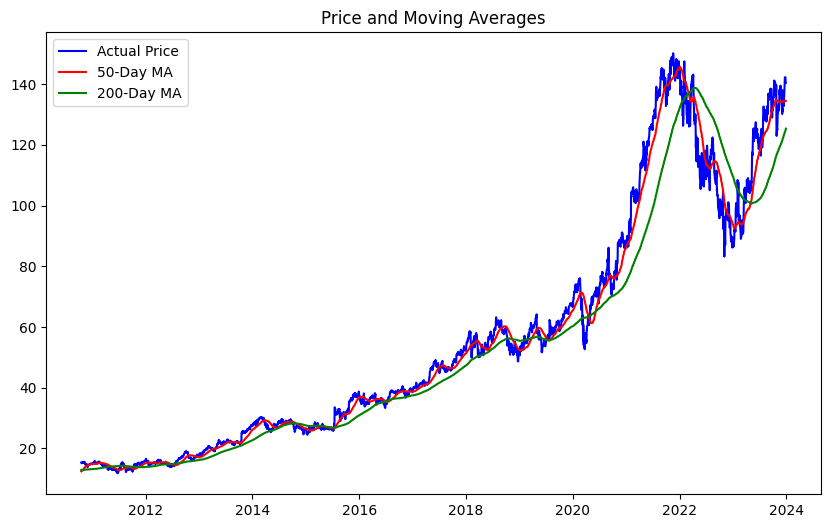

In [8]:

# Visualization: Moving Averages

plt.figure(figsize=(10, 6))
plt.plot(data[price_column], label='Actual Price', color='blue')
plt.plot(data['MA50'], label='50-Day MA', color='red')
plt.plot(data['MA200'], label='200-Day MA', color='green')
plt.title('Price and Moving Averages')
plt.legend()
plt.show()


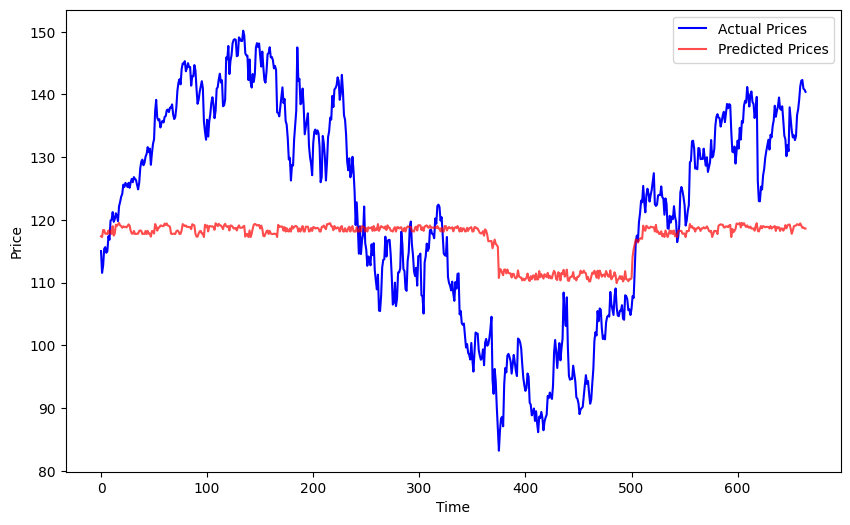

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()